# Código de Treinamento de modelos 

Autor: Caio Viktor da Silva Avila

Descrição:

    Código de Treinamento de modelos para classificação de tipo de resposta para perguntas QA. É dado como entrada uma pergunta de linguagem natural em texto plano e é classificado o tipo de sua resposta esperada, podendo este ser 'number', 'boolean', 'resource', 'string', 'date'.

Importando dataset de treino

In [1]:
import pandas as pd
dataset = pd.read_csv('train.csv',sep=",")
dataset

,id,answer_type,string,keywords
0,1,resource,Give me all cosmonauts.,cosmonauts
1,2,date,Give me the birthdays of all actors of the tel...,"television show, Charmed, actor, birthday"
2,3,resource,Who is the daughter of Robert Kennedy married to?,"Robert Kennedy, daughter, married"
3,4,resource,Which river does the Brooklyn Bridge cross?,"river, cross, Brooklyn Bridge"
4,5,number,How many countries are there in Europe?,"Europe, countries"
5,6,resource,In which city did John F. Kennedy die?,"city, John F. Kennedy, die"
6,7,boolean,Does the Isar flow into a lake?,"Isar, flow, lake"
7,8,resource,Which countries have more than ten caves?,"country, cave, more than ten"
8,9,boolean,Are tree frogs a type of amphibian?,"tree frog, amphibian"
9,10,resource,Who created Goofy?,"created, Goofy"


In [2]:
for classe in set(dataset['answer_type']):
    print(classe+":"+ str(len(dataset[dataset['answer_type'] == classe])))

resource:435
string:21
boolean:65
date:31
number:65


Tratando campo answertype (tipo de resposta). Os valores em string são convertidos para int

In [3]:
types = {}
cont = 0
for tipo in set(dataset['answer_type']):
    types[tipo] = cont
    cont = cont +1

dataset['answer_type'] = dataset['answer_type'].apply(lambda x : types[x] if x in types else x)
Y = dataset['answer_type']
labels = list(types.keys())
print(types)


{'resource': 0, 'string': 1, 'boolean': 2, 'date': 3, 'number': 4}


Definição de stopwords. A lista de stopwords é proveniente do pacote NLTK. Para o melhor resultado aconselhado setar stopList = None e manter código de stopwords comentado

In [4]:
stopList = None
#import nltk
#nltk.download('stopwords')
#from nltk.corpus import stopwords
#stopList = set(stopwords.words('english'))

## Selecionando modelo de vetorização de strings

### Bag Of Words

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words=stopList)
X = vectorizer.fit_transform(dataset['string']).todense()
X.shape

(617, 1414)

### TF-IDF

In [6]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#vectorizer = TfidfVectorizer(stop_words=stopList)
#X = vectorizer.fit_transform(dataset['string']).todense()
#X.shape

### HashVectorizer

In [7]:
#from sklearn.feature_extraction.text import HashingVectorizer
#vectorizer = HashingVectorizer(n_features=20)
#X = vectorizer.fit_transform(dataset['string']).todense()
#X.shape

## Seleção de classe do modelo 

### Naive Bayes

In [8]:
#from sklearn.naive_bayes import GaussianNB
#model = GaussianNB()

### SVM

In [9]:
from sklearn.svm import SVC  
model = SVC(kernel='linear',C=1)

### Peceptron 

In [10]:
#from sklearn.linear_model import Perceptron
#model = Perceptron(tol=1e-3, random_state=0,penalty = 'l1',alpha =0.000001,eta0 =10)

### MLP

In [11]:
#from sklearn.neural_network import MLPClassifier
#model = MLPClassifier(solver = 'lbfgs',hidden_layer_sizes=(500,500))

Avaliação de modelo selecionado.A métrica utilizada é F1-Score ponderada. Utiliza validação cruzada k-fold, sen k = 10

In [12]:
from sklearn.model_selection import cross_val_score
experimentLoop = 10
scores = cross_val_score(model, X, Y, cv=experimentLoop, scoring="f1_weighted")
print("pontuação media: "+str(scores.mean())+" para "+ str(experimentLoop)+" iteracoes(k-folds)")

C:\Users\caioviktor\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\caioviktor\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\caioviktor\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


pontuação media: 0.9288305849730056 para 10 iteracoes(k-folds)


Treinamento de modelo com dados completos

In [13]:
model.fit(X,Y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Teste do modelo com 2/3 de treino e 1/3 teste em dados aleatórios. Usa F1-Score ponderada.

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

method = 'Nao sei'

method = 'SVM'
from sklearn.svm import SVC  
modelMa = SVC(kernel='linear',C=1)

#method = 'Naive Bayes'
#from sklearn.naive_bayes import GaussianNB
#modelMa = GaussianNB()

#method = 'Perceptron'
#from sklearn.linear_model import Perceptron
#modelMa = Perceptron(tol=1e-3, random_state=0,penalty = 'l1',alpha =0.000001,eta0 =10)

#ethod = 'MLP'
#rom sklearn.neural_network import MLPClassifier
#odelMa = MLPClassifier(solver = 'lbfgs',hidden_layer_sizes=(500,500))

modelMa.fit(X_train,Y_train)

Y_predicted = modelMa.predict(X_test)
from sklearn.metrics import f1_score
score = f1_score(Y_test,Y_predicted,average='weighted')
score

0.9022038535556122

Mapa de confusão para valores testados

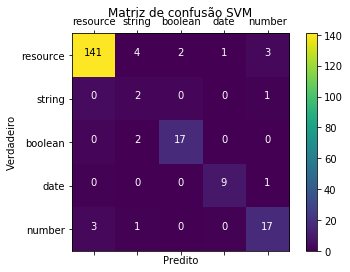

In [15]:
from sklearn.metrics import confusion_matrix
Y_predicted = modelMa.predict(X_test)
confusionMatrix = confusion_matrix(Y_test,Y_predicted)
#confusionMatrix

import matplotlib.pyplot as plt
%matplotlib inline


fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusionMatrix)
plt.title('Matriz de confusão '+method)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
thresh = confusionMatrix.max() / 2.
import itertools
for i,j in itertools.product(range(0,confusionMatrix.shape[0]),range(0,confusionMatrix.shape[1])):
    plt.text(i,j,format(confusionMatrix[i,j],'d'),horizontalalignment='center',color='black' if confusionMatrix[i,j] >thresh else 'white')
plt.show()
#model.score(X_test,Y_test)

Teste interativo do modelo final. Para selecionar a questão de entrada altere o valor da variável 'ask'.

In [16]:
ask = 'Who was the first man to step in the moon?'
vect = vectorizer.transform([ask]).todense()
response =model.predict(vect)
print('tipo de retorno esperado: '+str(list(types.keys())[response[0]]))


tipo de retorno esperado: resource


Salvando modelo

In [17]:
#import pickle
#filename = 'model_MLP.sav'
#modelStringToArray = 'vectorizer_BagOfWords.sav'
#pickle.dump(model, open(filename, 'wb'))
#pickle.dump(vectorizer, open(modelStringToArray, 'wb'))
#loaded_model = pickle.load(open(filename, 'rb'))

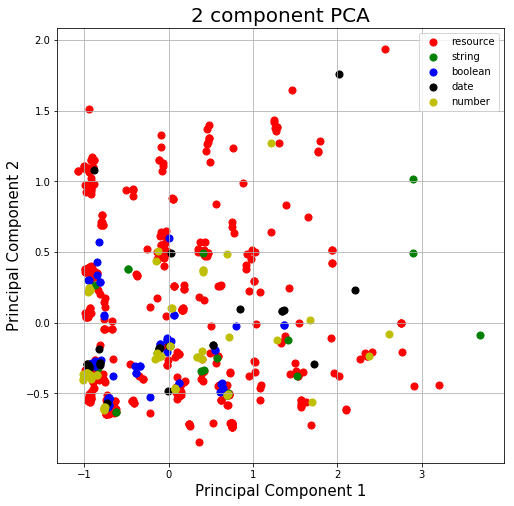

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
XN = pca.transform(X)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)


targets = [0, 1, 2, 3, 4]
colors = ['r', 'g', 'b','k','y']
for target, color in zip(targets,colors):
#    print(dataset['answer_type'])
    indicesToKeep = dataset['answer_type'] == target
    ax.scatter(XN[indicesToKeep,0]
               , XN[indicesToKeep, 1]
               , c = color
               , s = 50)
ax.legend(labels)
ax.grid()
